<center><font size = 6><b>Linear Regression Homework 1</b></font></center>
**UNI:** qy2205  
**Name:** Quan Yuan  
**Email:** quan.yuan@columbia.edu

## 1. Chapter 1 problem 19

#### a. Obtain the least square estimate of $\beta_0$ and $\beta_1$, and state the estimated reg function

**Solution:**  
For any questions like:
$$y_i = \beta_1 + \beta_2x_{2i}+...+\beta_kx_{ki}+\epsilon_i$$
where $i \in (1, 2, .., n)$  
We set y = $\left(\begin{array}{c}
         y_1 \\
         \vdots \\
         y_n
         \end{array}\right)$
         $X = \left(\begin{array}{c}
         1 & x_{21} & \cdots & x_{k1}\\
         1 & x_{22} & \cdots & x_{k2}\\
         \vdots \\
         1 & x_{2n} & \cdots & x_{kn} \\
         \end{array}\right)$
         $\beta = \left(\begin{array}{c}
         \beta_1 \\
         \vdots \\
         \beta_n
         \end{array}\right)$
         $\beta = \left(\begin{array}{c}
         \beta_1 \\
         \vdots \\
         \beta_n
         \end{array}\right)$
         $\epsilon = \left(\begin{array}{c}
         \epsilon_1 \\
         \vdots \\
         \epsilon_n
         \end{array}\right)$

Thus, the function can be written as:
$$y = X\beta + \epsilon$$
We define the error as $$S = \sum_{i}^n \epsilon_i^2 = \epsilon_i^T \epsilon_i = (y - X\beta)^T(y-X\beta) = y^Ty - y^TX\beta - \beta X^Ty + \beta^T X^T X \beta$$
Then we calculate the first order derivatives of the error term, we get
$$\frac{\partial S}{\partial \beta} = -2X^T y + 2X^T X \beta$$
Let the first order derivatives equals to zero, we can get
$$\beta = (X^TX)^{-1}X^T y$$
And we also need to check the second order derivatives
$$\frac{\partial^2 S}{\partial \beta^2} = 2X^T X$$
which is a positive matrix.

The following is the `python` code for this problem

In [177]:
# import packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
params = {'legend.fontsize': 5,
          'figure.figsize': (14, 6),
          'axes.labelsize': 15,
          'axes.titlesize': 18,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12,
         'font.family': 'Times New Roman'}
plt.rcParams.update(params)

# clean data
CH01PR19 = pd.read_table('CH01PR19.txt', header = None, sep = ' ')[[1, 5]]
CH01PR19.columns = ['GPA', 'ACT']
CH01PR19.head(3)

,GPA,ACT
0,3.897,21
1,3.885,14
2,3.778,28


In [310]:
# define our linear regression
class LinearReg:
    def __init__(self, data):
        '''data: type: pandas dataframe'''
        self.data = data
        self.length = len(data)
    def ols(self, x, y):
        '''
        x: column name
        y: column name
        '''
        X = np.matrix(np.vstack([np.ones(self.length), self.data[x].values]).T)
        y = np.matrix(self.data[y].values).T
        beta = np.linalg.inv(X.T*X)*X.T*y
        return beta
    def sklearn_ols(self, x, y):
        X = np.matrix(self.data[x].values).T
        y = np.matrix(self.data[y].values).T
        # Create linear regression object
        OLS = linear_model.LinearRegression()
        # Train the model using the training sets
        OLS.fit(X, y)
        return np.vstack([OLS.intercept_, OLS.coef_])
    def visual(self, x, y):
        para = self.ols(x, y)
        X = self.data[x]
        Y = self.data[y]
        min_x, max_x = min(X), max(X)
        # x is also matrix
        func = lambda x: x*para
        x_sim = np.arange(min_x, max_x, 0.01)
        xm = np.vstack([np.ones(len(x_sim)), x_sim]).T
        y_sim = func(xm)
        self.data.plot.scatter(x,y)
        plt.plot(x_sim, y_sim)
        plt.title('The Relationship Between ACT score and GPA')

In [312]:
# Run regression
LReg19 = LinearReg(data = CH01PR19)
beta_ols = LReg19.ols(x = 'ACT', y = 'GPA')
beta_sklearn = LReg19.sklearn_ols(x = 'ACT', y = 'GPA')
print('OLS coded by myself \\beta_0 is {0}, \\beta_1 is {1}'.format(round(float(beta_ols[0]), 3), round(float(beta_ols[1]), 3)))
print('OLS by sklearn \\beta_0 is {0}, \\beta_1 is {1}'.format(round(float(beta_sklearn[0]), 3), round(float(beta_sklearn[1]), 3)))
print('The line is y = {0}x + {1}'.format(round(float(beta_ols[1]), 3), round(float(beta_ols[0]), 3)))

OLS coded by myself \beta_0 is 2.114, \beta_1 is 0.039
OLS by sklearn \beta_0 is 2.114, \beta_1 is 0.039
The line is y = 0.039x + 2.114


#### b. Plot the regression function and data

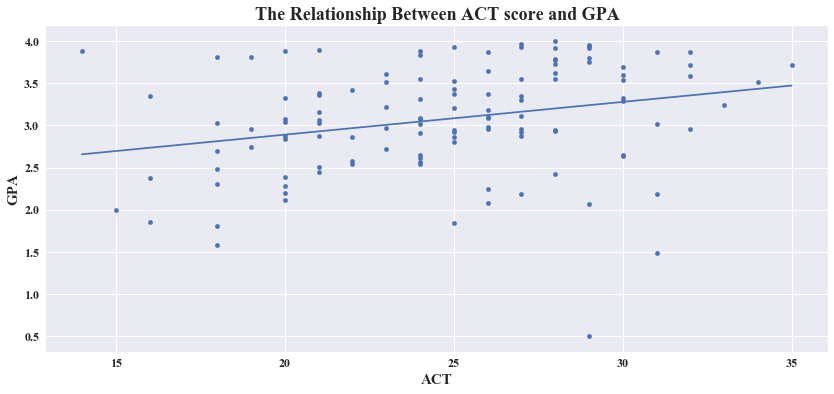

In [314]:
# visualization
LReg19.visual(x = 'ACT', y = 'GPA')

#### c. point estimate

In [319]:
meanx30 = round(CH01PR19[CH01PR19['ACT'] == 30]['GPA'].mean(), 3)
print('point estimate of the mean freshman GPA for student with ACT test score X = 30 is {0}'.format(meanx30))

point estimate of the mean freshman GPA for student with ACT test score X = 30 is 3.248


#### d. point estimate